# 1 Data wrangling<a id='2_Data_wrangling'></a>

## 1.1 Contents<a id='1.1_Contents'></a>

* [1.1 Contents](#1.1_Contents)
* [1.2 Introduction](#1.2_Introduction)
* [1.3 Imports](#1.3_Imports)
* [1.4 Load the 2019 Dataset](#1.4_Load_the_2019_dataset)
* [1.5 Explore Data](#1.5_Explore_Data)
    * [1.5.1 Overview of the Dataset](#1.5.1_Overview_of_Dataset)
    * [1.5.2 Number of Missing Values by Column](#1.5.2_Number_of_Missing_Values_by_Column)
    * [1.5.3 Categorical Features](#1.5.3_Categorical_Features)
    * [1.5.4 Numeric Features](#1.5.4_Numeric_Features)
        * [1.5.4.1 Numeric Data Summary](#1.5.4.1_Numeric_Data_Summary)    
        * [1.5.4.2 Distributions of Feature Values](#1.5.4.2_Distributions_of_Feature_Values)        
        * [1.5.4.3 Missing Numeric Values](#1.5.4.3_Missing_Numeric_Values)     
        * [1.5.4.4 Select Policy with One-year Period](#1.5.4.4_One-year_Policy)            
        * [1.5.4.5 Calculate the Building Age](#1.5.4.5_Buidling_Age)          
        * [1.5.4.5 Data Exploration for a Few Features](#1.5.4.6_Exploration_Features)       
    * [1.5.5 Target](#1.5.5_Target)    
* [1.6 Data Cleaning and Save New Data](#1.6_Data_Cleaning)    
* [1.7 Summary](#1.7_Summary) 
   

## 1.2 Introduction<a id='1.2_Introduction'></a>

FEMA has National Flood Insurance Program (NFIP) which provides flood insurance to the property owners, renters, and business owners. The program has the insurance policy information of more than 23,000 participating NFIP communities across the U.S., including Houston area (https://www.fema.gov/openfema-data-page/fima-nfip-redacted-policies-v1). 

The dataset is updated every 40 to 60 days according to the FEMA website, and the dataset used in this study was downloaded in May 2022, which includes the flood insurance policy information from 2009 to 2019. 

After the preliminary exploration of the dataset by filtering the policy information for Houston area in 2018 and 2019, more than 300,000 records are obtained before data cleaning and pre-processing. The preliminary approach is to use 2018 or 2019 data only in the machine learning model, which will reduce the number of records to around 100,000. 

Because the original dataset size is about 12GB, it cannot be uploaded to Github. Thus, preliminary data processing is conducted using the script below to extract the data for Houston area in 2018 and 2019. After that, additional step is taken to generate the spreadsheets for 2018 and 2019 datasets, respectively. For this Jupyter Notebook, the 2019 dataset is explored. If 2018 dataset is determined to be needed in the machine learning model as well, the same approach will be used to clean and pre-process the 2018 dataset.

import pandas as pd

from datetime import datetime

data ='nfip-flood-policies.csv'

chunksize = 10 ** 6

for i, chunk in enumerate(pd.read_csv(data, parse_dates=['policyeffectivedate'], chunksize = chunksize, low_memory=False)):

    data = chunk[(chunk['propertystate'] == 'TX') & (chunk['policyeffectivedate'].dt.year >= 2018) & (chunk['reportedcity'].str.contains('HOUSTON'))]
    data.to_csv('nfip-flood-policies-tx-after-2018-{}.csv'.format(i), index=False)


## 1.3 Imports<a id='1.3_Imports'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
%matplotlib inline
sns.set(style="darkgrid")

## 1.4 Load the 2019 Dataset<a id='1.4_Load_the_2019_dataset'></a>

In [4]:
data2019 = pd.read_excel('../data/nfip-flood-policies-houston-2019.xlsx', sheet_name='2019', 
                         parse_dates=['originalconstructiondate', 'policyterminationdate', 'policyeffectivedate'])

## 1.5 Explore Data<a id='1.5_Explore_Data'></a>

### 1.5.1 Overview of the Dataset<a id='1.5.1_Overview_of_Dataset'></a>

Check the size of the dataset

In [5]:
data2019.shape

(155018, 45)

We can see there are 45 columns (features + target) and 155,018 rows. This is a lot of data! Some of the columns (features) can be removed in the modeling.

Let's drop the duplicate records. 

In [6]:
data2019.drop_duplicates(keep='first', inplace=True)
data2019.shape

(152557, 45)

We still have more than 152,000 records left.

Check the first 10 rows

In [7]:
data2019.head(n=10)

,agriculturestructureindicator,basefloodelevation,basementenclosurecrawlspacetype,cancellationdateoffloodpolicy,censustract,condominiumindicator,construction,countycode,crsdiscount,deductibleamountinbuildingcoverage,...,primaryresidenceindicator,propertystate,reportedzipcode,ratemethod,regularemergencyprogramindicator,reportedcity,smallbusinessindicatorbuilding,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,totalinsurancepremiumofthepolicy
0,N,NaN,0.0,NaT,4.820143e+10,N,N,48201.0,0.00,F,...,N,TX,77024,7,R,HOUSTON,N,250000,100000,376
1,N,NaN,0.0,NaT,4.820152e+10,N,N,48201.0,0.00,F,...,Y,TX,77043,7,R,HOUSTON,N,200000,80000,353
2,N,NaN,0.0,NaT,4.820154e+10,N,N,48201.0,0.00,F,...,Y,TX,77084,7,R,HOUSTON,N,250000,100000,374
3,N,NaN,0.0,NaT,NaN,N,N,NaN,0.00,F,...,Y,TX,77008,7,R,HOUSTON,N,250000,100000,376
4,N,NaN,0.0,NaT,NaN,N,N,48201.0,0.00,F,...,Y,TX,77067,7,R,HOUSTON,N,250000,100000,376
5,NaN,113.8,0.0,NaT,4.820154e+10,N,N,48201.0,0.15,3,...,Y,TX,77084,1,R,HOUSTON,N,199700,55100,726
6,N,83.1,0.0,NaT,4.820153e+10,N,N,48201.0,0.25,E,...,N,TX,77040,1,R,HOUSTON,Y,500000,275600,2588
7,N,NaN,0.0,NaT,4.820154e+10,N,N,48201.0,0.00,F,...,N,TX,77084,7,R,HOUSTON,N,150000,60000,320
8,NaN,NaN,0.0,NaT,4.820133e+10,N,N,48201.0,0.00,F,...,Y,TX,77047,7,R,HOUSTON,N,250000,100000,376
9,N,NaN,0.0,NaT,4.820124e+10,N,N,48201.0,0.15,G,...,Y,TX,77032,1,R,HOUSTON,N,91000,0,924


We can see that (1) there are missing values in some columns; (2) a lot columns have categorical data such as "Y" and "N"; (3) some columns may not be used in the machine learning model, such as zipcode, reportedcity, etc. First, we need to get to know what each variable means. The explanation of each variable is shown below, which is obtained from: https://www.fema.gov/openfema-data-page/fima-nfip-redacted-policies-v1


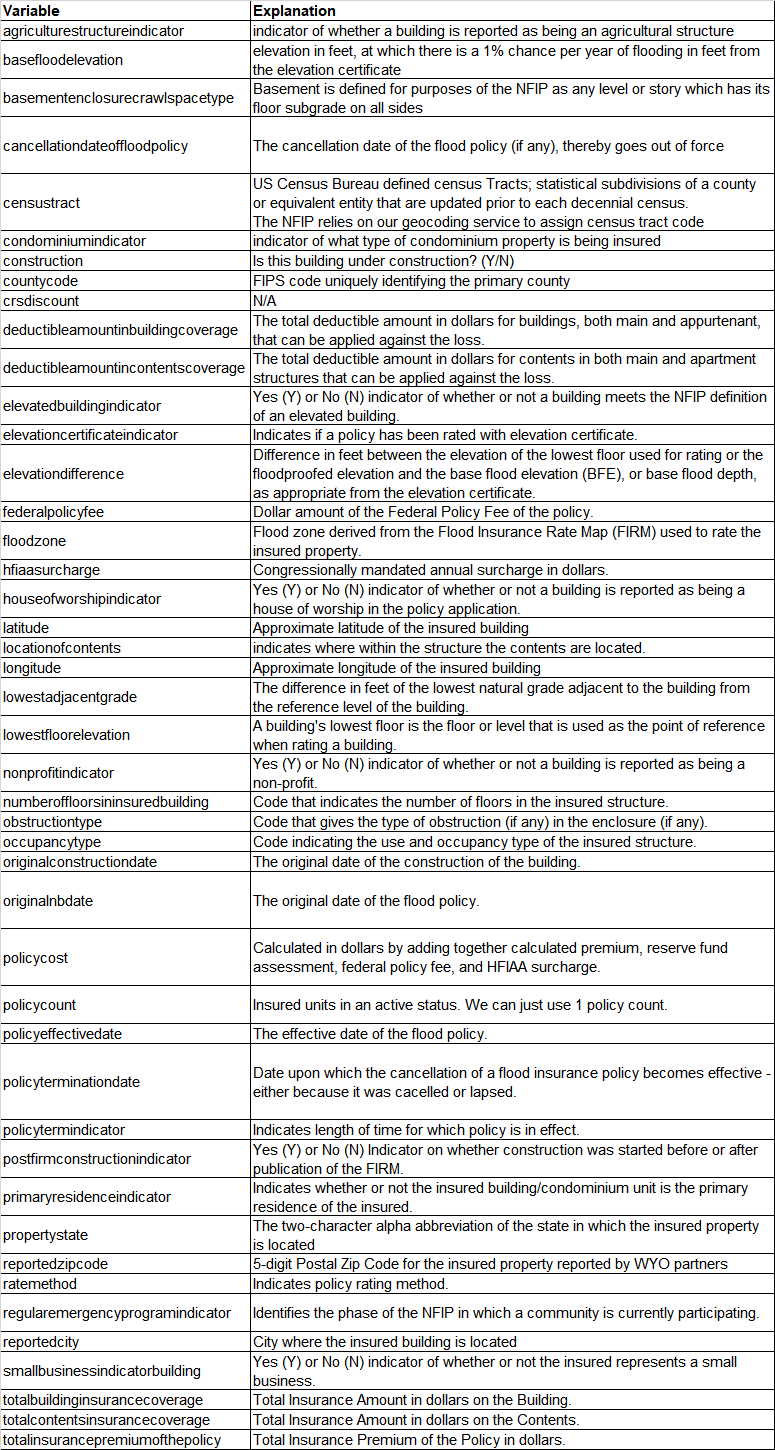

Get a summary of the data

In [8]:
data2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152557 entries, 0 to 155017
Data columns (total 45 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   agriculturestructureindicator       124370 non-null  object        
 1   basefloodelevation                  23638 non-null   float64       
 2   basementenclosurecrawlspacetype     152551 non-null  float64       
 3   cancellationdateoffloodpolicy       816 non-null     datetime64[ns]
 4   censustract                         138990 non-null  float64       
 5   condominiumindicator                152557 non-null  object        
 6   construction                        152557 non-null  object        
 7   countycode                          143345 non-null  float64       
 8   crsdiscount                         152557 non-null  float64       
 9   deductibleamountinbuildingcoverage  149670 non-null  object        
 10  deductib

**`totalinsurancepremiumofthepolicy` is the insurance premium price which is the target.**

### 1.5.2 Number of Missing Values by Column<a id='1.5.2_Number_of_Missing_Values_by_Column'></a>

Count the number of missing values in each column and sort them.

In [9]:
missing = pd.concat([data2019.isnull().sum(), 100 * data2019.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
cancellationdateoffloodpolicy,151741,99.465118
obstructiontype,145892,95.631141
lowestadjacentgrade,128994,84.554625
basefloodelevation,128919,84.505464
lowestfloorelevation,128736,84.385508
elevationcertificateindicator,109360,71.684682
agriculturestructureindicator,28187,18.476373
locationofcontents,24758,16.228688
latitude,13567,8.893069
censustract,13567,8.893069


`cancellationdateoffloodpolicy` has the largest percentage of missing values, followed by `obstructiontype`, `lowestadjacentgrade`, `basefloodelevation`, `lowestfloorelevation`, and `elevationcertificateindicator`, and all these six variables have more than 70% of missing values. 


**Preliminary strategy for missing values**

**For these six variables with the most missing values:**

`cancellationdateoffloodpolicy` can be deleted, because similar information can be found for the variable of `policyterminationdate`. 

`obstructiontype` describes the type of obstruction (if any) in the enclosure (if any). This variable doesn't seem to be very important, just based on professional judgment, so it can be deleted as well.

`lowestadjacentgrade`, `basefloodelevation`, `lowestfloorelevation`, and `elevationcertificateindicator` are all somewhat related. For example, `basefloodelevation` describes the elevation at which there is a 1% chance per year of flooding from the elevation certificate. `elevationcertificateindicator` descrbies if a policy has been rated with elevation certificate. 
`lowestfloorelevation` describes a building's lowest floor which is the floor or level that is used as the point of reference when rating a building. The elevation in feet of the reference level of the building from the elevation certificate.
`lowestadjacentgrade` describes the lowest natural grade adjacent to the insured structure prior to excavating or filling. The difference in feet of the lowest natural grade adjacent to the building from the reference level of the building. 
Overall, these variables have more than 70% of missing values, it's difficult to fill in those missing values with mean or median values, or any of other appraoches. The preliminary plan is to delete these variables. However, we can take a look later to see if they should be included.

**Other variables with missing values**

Next, `agriculturestructureindicator` has 18% of missing values. This variable describes that whether a building is reported as being an agricultural structure in the policy application. This is categorical data with values of 0 and 1. Based on professional judgment, this variable  doesn't seem to be very important, so it can be deleted.

`locationofcontents` indicates where within the structure the contents are located. This variable seems important so should be kept.

For other variables, the number of missing values are less than 10% of total number, and given that the total number of records is more than 150,000, so those missing records can be dropped without significant impact on the size of the dataset. 

**The not-so-important variables**

These variables don't seem to be important to the policy premium based on their descriptions, including `latitude`, `censustract`, `longitude`, `countycode`, `nonprofitindicator`, `houseofworshipindicator`, `regularemergencyprogramindicator`, `reportedcity`, `reportedzipcode`, `propertystate`. They can be deleted.

### 1.5.3 Categorical Features<a id='1.5.3_Categorical_Features'></a>

Check how the categorical data look like

In [10]:
data2019.select_dtypes(include = 'object')

,agriculturestructureindicator,condominiumindicator,construction,deductibleamountinbuildingcoverage,deductibleamountincontentscoverage,elevatedbuildingindicator,elevationcertificateindicator,floodzone,houseofworshipindicator,locationofcontents,nonprofitindicator,postfirmconstructionindicator,primaryresidenceindicator,propertystate,ratemethod,regularemergencyprogramindicator,reportedcity,smallbusinessindicatorbuilding
0,N,N,N,F,F,N,NaN,X,N,Lowest floor only above ground level (No basem...,N,Y,N,TX,7,R,HOUSTON,N
1,N,N,N,F,F,N,NaN,X,N,Lowest floor only above ground level (No basem...,N,N,Y,TX,7,R,HOUSTON,N
2,N,N,N,F,F,N,NaN,X,N,Lowest floor only above ground level (No basem...,N,Y,Y,TX,7,R,HOUSTON,N
3,N,N,N,F,F,N,NaN,X,N,Lowest floor above ground level and higher flo...,N,Y,Y,TX,7,R,HOUSTON,N
4,N,N,N,F,F,N,NaN,X,N,Lowest floor only above ground level (No basem...,N,Y,Y,TX,7,R,HOUSTON,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155013,N,N,N,F,F,N,NaN,X,N,Lowest floor only above ground level (No basem...,N,N,Y,TX,7,R,HOUSTON,N
155014,N,N,N,5,NaN,N,NaN,AE,N,NaN,N,N,N,TX,B,R,HOUSTON,N
155015,N,N,N,F,F,N,NaN,X,N,Lowest floor only above ground level (No basem...,N,Y,Y,TX,7,R,HOUSTON,N
155016,N,N,N,2,2,N,1,AE,N,Lowest floor only above ground level (No basem...,N,N,N,TX,1,R,HOUSTON,N


**Let's check how many unique values for each variable**

In [11]:
df_cat = data2019.select_dtypes(include = 'object')
df_cat.nunique()

agriculturestructureindicator          2
condominiumindicator                   5
construction                           2
deductibleamountinbuildingcoverage    13
deductibleamountincontentscoverage    13
elevatedbuildingindicator              2
elevationcertificateindicator          9
floodzone                             22
houseofworshipindicator                2
locationofcontents                     5
nonprofitindicator                     2
postfirmconstructionindicator          2
primaryresidenceindicator              2
propertystate                          1
ratemethod                            13
regularemergencyprogramindicator       2
reportedcity                          11
smallbusinessindicatorbuilding         2
dtype: int64

These 9 variables have binary values (Y or N): `agriculturestructureindicator`, `construction`, `elevatedbuildingindicator`, `houseofworshipindicator`, `nonprofitindicator`, `postfirmconstructionindicator`, `primaryresidenceindicator`, `regularemergencyprogramindicator`, and `smallbusinessindicatorbuilding`. 

As explained earlier, some of these variables can be deleted because they seem not to be very important to the premium calculation, including `agriculturestructureindicator`, `houseofworshipindicator`, `nonprofitindicator`, `postfirmconstructionindicator`, `regularemergencyprogramindicator`.

Other variables have more than 2 unique values. For example, `floodzone` is a very important feature which has 22 unique values. We may want to combine some values to decrease the number of unique values. 

**Let's check the percentage of missing values for each variable**

In [12]:
df_cat.isnull().mean()*100

agriculturestructureindicator         18.476373
condominiumindicator                   0.000000
construction                           0.000000
deductibleamountinbuildingcoverage     1.892407
deductibleamountincontentscoverage     4.809350
elevatedbuildingindicator              0.003933
elevationcertificateindicator         71.684682
floodzone                              0.018354
houseofworshipindicator                0.030808
locationofcontents                    16.228688
nonprofitindicator                     0.030808
postfirmconstructionindicator          0.017698
primaryresidenceindicator              0.015076
propertystate                          0.000000
ratemethod                             0.679746
regularemergencyprogramindicator       0.000000
reportedcity                           0.000000
smallbusinessindicatorbuilding         0.036052
dtype: float64

`elevationcertificateindicator` has more than 70% of missing values. Next, `agriculturestructureindicator` can also be removed since it doesn't seem to be an important variable. However, `locationofcontents` is important, so it needs to be kept. Other variables have less than 1% of missing values, so we can just use dropna method to delete the records. 

**Let's conduct preliminary data processing to explore the premium data for some categorical features**

First, let's check how `elevationcertificateindicator` looks like.

In [13]:
elevcert_median = data2019.groupby('elevationcertificateindicator')['totalinsurancepremiumofthepolicy'].median()
elevcert_median

elevationcertificateindicator
1     376.0
2    1055.0
3     568.0
4     917.0
A     421.5
B     511.5
C     359.5
D     369.0
E     514.0
Name: totalinsurancepremiumofthepolicy, dtype: float64

Text(0, 0.5, 'Elevation Certificate Indicator')

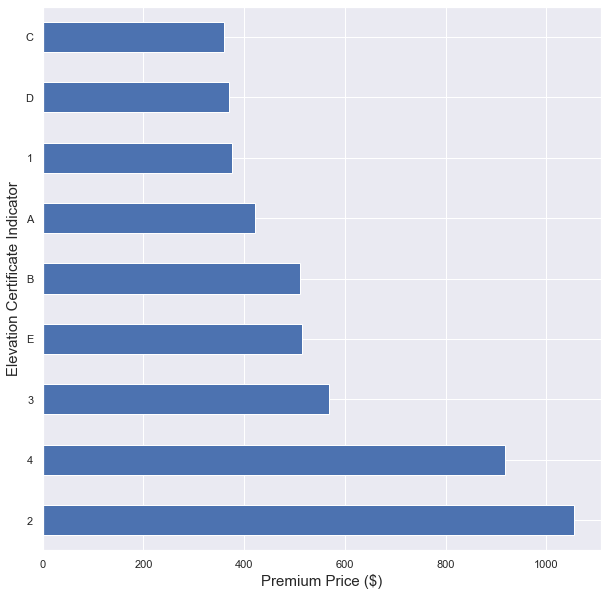

In [14]:
(elevcert_median.reindex(index=elevcert_median.sort_values(ascending=False).index).plot(kind='barh', figsize=(10, 10)))
plt.xlabel('Premium Price ($)', fontsize=15)
plt.ylabel('Elevation Certificate Indicator', fontsize=15)

**`floodzone` is considered to be a very important feature, so let's explore the median premium data for each flood zone.**

In [15]:
floodzone_median = data2019.groupby('floodzone')['totalinsurancepremiumofthepolicy'].median()
floodzone_median

floodzone
A      1175.0
A01     456.5
A03     589.0
A04     426.5
A05     322.0
A06     668.0
A07    1194.0
A08     499.0
A10     555.0
A14     701.0
A15     549.0
A16     670.0
A17     460.0
AE      733.0
AH     1018.0
AHB     253.0
AO     1029.5
AOB     292.0
B       376.0
C      1240.0
VE     1118.5
X       376.0
Name: totalinsurancepremiumofthepolicy, dtype: float64

Text(0, 0.5, 'Flood Zone')

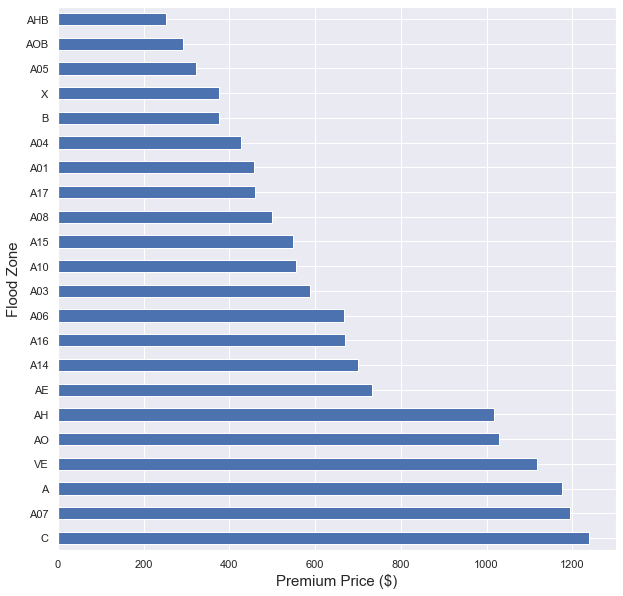

In [16]:
(floodzone_median.reindex(index=floodzone_median.sort_values(ascending=False).index).plot(kind='barh', figsize=(10, 10)))
plt.xlabel('Premium Price ($)', fontsize=15)
plt.ylabel('Flood Zone', fontsize=15)

**`locationofcontents` is also considered to be an important feature, so let's explore the median premium data for location of contents.**

In [17]:
locationofcontents_median = data2019.groupby('locationofcontents')['totalinsurancepremiumofthepolicy'].median()
locationofcontents_median

locationofcontents
Above ground level more than one full floor                                                                 374.0
Basement/Enclosure/Crawlspace/Subgrade Crawlspace and above                                                 419.0
Lowest floor above ground level and higher floors (No basement/enclosure/crawlspace/subgrade crawlspace)    376.0
Lowest floor only above ground level (No basement/enclosure/crawlspace/subgrade crawlspace)                 376.0
Manufactured (mobile) home or travel trailer on foundation                                                  245.0
Name: totalinsurancepremiumofthepolicy, dtype: float64

The median premium price is from 245 to 419 for the 5 different `locationofcontents`.

**Next, `ratemethod` indicates policy rating method, so let's explore the median premium data for rating method.**

In [18]:
ratemethod_median = data2019.groupby('ratemethod')['totalinsurancepremiumofthepolicy'].median()
ratemethod_median

ratemethod
1     917.0
2     658.0
3     596.0
5    5974.5
6     454.0
7     376.0
8     672.5
B     665.0
E     568.0
F     370.0
G     600.0
S     550.0
W    2853.0
Name: totalinsurancepremiumofthepolicy, dtype: float64

Text(0, 0.5, 'Rate Method')

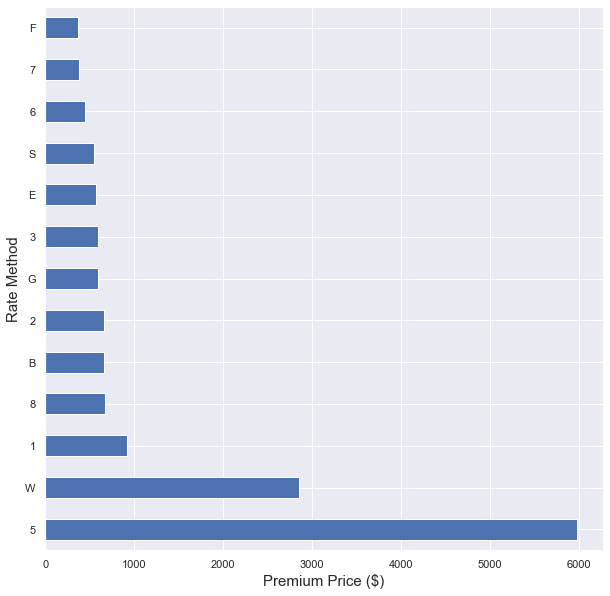

In [19]:
(ratemethod_median.reindex(index=ratemethod_median.sort_values(ascending=False).index).plot(kind='barh', figsize=(10, 10)))
plt.xlabel('Premium Price ($)', fontsize=15)
plt.ylabel('Rate Method', fontsize=15)

**Next, `deductibleamountinbuildingcoverage` indicates the total deductible amount for buildings that can be applied against the loss, so let's explore the median premium data for `deductibleamountinbuildingcoverage`.**

In [20]:
deduct_building_median = data2019.groupby('deductibleamountinbuildingcoverage')['totalinsurancepremiumofthepolicy'].median()
deduct_building_median

deductibleamountinbuildingcoverage
0     215.0
1     274.0
2    1133.0
3     989.5
4    1023.0
5     942.0
A     947.0
B    1764.0
C    1829.0
D    1242.0
E    1563.5
F     376.0
G     777.0
Name: totalinsurancepremiumofthepolicy, dtype: float64

Text(0, 0.5, 'Deductible for Building Coverage')

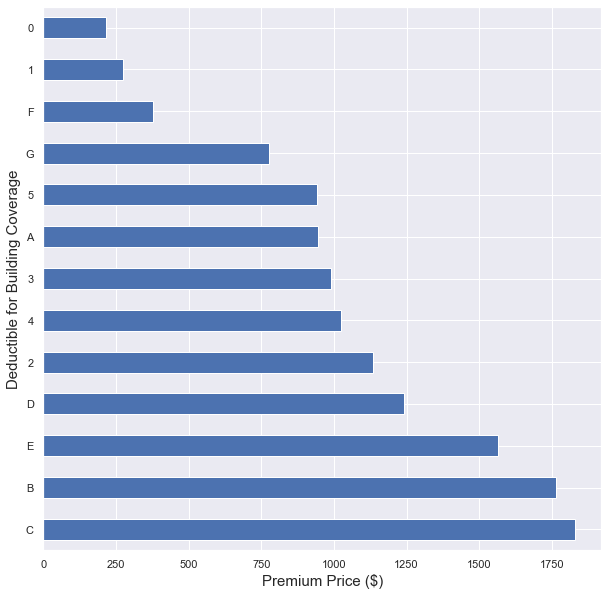

In [21]:
(deduct_building_median.reindex(index=deduct_building_median.sort_values(ascending=False).index).plot(kind='barh', figsize=(10, 10)))
plt.xlabel('Premium Price ($)', fontsize=15)
plt.ylabel('Deductible for Building Coverage', fontsize=15)

**Last, `deductibleamountincontentscoverage` indicates the total deductible amount for contents in both main and apartment structures that can be applied against the loss, so let's explore the median premium data for `deductibleamountincontentscoverage`.**

In [22]:
deduct_content_median = data2019.groupby('deductibleamountincontentscoverage')['totalinsurancepremiumofthepolicy'].median()
deduct_content_median

deductibleamountincontentscoverage
0     727.0
1     251.0
2    1213.0
3    1044.0
4    1058.0
5    1063.5
A     978.0
B    3033.5
C    2038.5
D    1762.0
E    2000.0
F     376.0
G     761.0
Name: totalinsurancepremiumofthepolicy, dtype: float64

Text(0, 0.5, 'Deductible for Content Coverage')

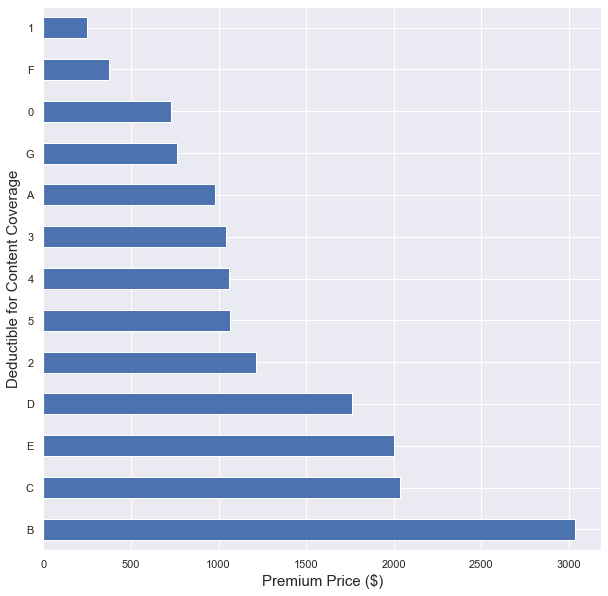

In [23]:
(deduct_content_median.reindex(index=deduct_content_median.sort_values(ascending=False).index).plot(kind='barh', figsize=(10, 10)))
plt.xlabel('Premium Price ($)', fontsize=15)
plt.ylabel('Deductible for Content Coverage', fontsize=15)

### 1.5.4 Numeric Features<a id='1.5.4_Numeric_Features'></a>

#### 1.5.4.1 Numeric Data Summary<a id='1.5.4.1_Numeric_Data_Summary'></a>

Check the statistics of the numerical features

In [24]:
data2019.describe().T

,count,mean,std,min,25%,50%,75%,max
basefloodelevation,23638.0,6.258129e+01,7.039355e+01,-5.500000e+01,4.940000e+01,5.900000e+01,7.800000e+01,9.997000e+03
basementenclosurecrawlspacetype,152551.0,5.901633e-02,3.949507e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
censustract,138990.0,4.820111e+10,3.812465e+06,4.803966e+10,4.820134e+10,4.820143e+10,4.820152e+10,4.837321e+10
countycode,143345.0,4.820069e+04,3.785519e+00,4.803900e+04,4.820100e+04,4.820100e+04,4.820100e+04,4.837300e+04
crsdiscount,152557.0,4.777395e-02,9.298668e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e-01
elevationdifference,152557.0,8.433434e+02,3.638272e+02,-9.986000e+03,9.990000e+02,9.990000e+02,9.990000e+02,9.989000e+03
federalpolicyfee,152557.0,3.176452e+01,4.649017e+01,-1.600000e+03,2.500000e+01,2.500000e+01,2.500000e+01,2.000000e+03
hfiaasurcharge,152557.0,5.837626e+01,8.122970e+01,-2.250000e+02,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+02
latitude,138990.0,2.977091e+01,1.109165e-01,2.950000e+01,2.970000e+01,2.980000e+01,2.980000e+01,3.080000e+01
longitude,138990.0,-9.544398e+01,1.558144e-01,-9.590000e+01,-9.560000e+01,-9.550000e+01,-9.540000e+01,-9.510000e+01


For the target `totalinsurancepremiumofthepolicy`, the mean price is 582 and median price is 376, but the maximum price is 54,734 and the minimum price is only 1, so there are some extreme outlier values.

In [25]:
data2019['totalinsurancepremiumofthepolicy'].isnull().sum()

0

Note that there is no missing value for the target, which is good!

#### 1.5.4.2 Distributions of Feature Values<a id='1.5.4.2_Distributions_of_Feature_Values'></a>

Here we can take a look of the distributions of numerical features, which will help understand how each feayure looks like and whether there are any outliers.

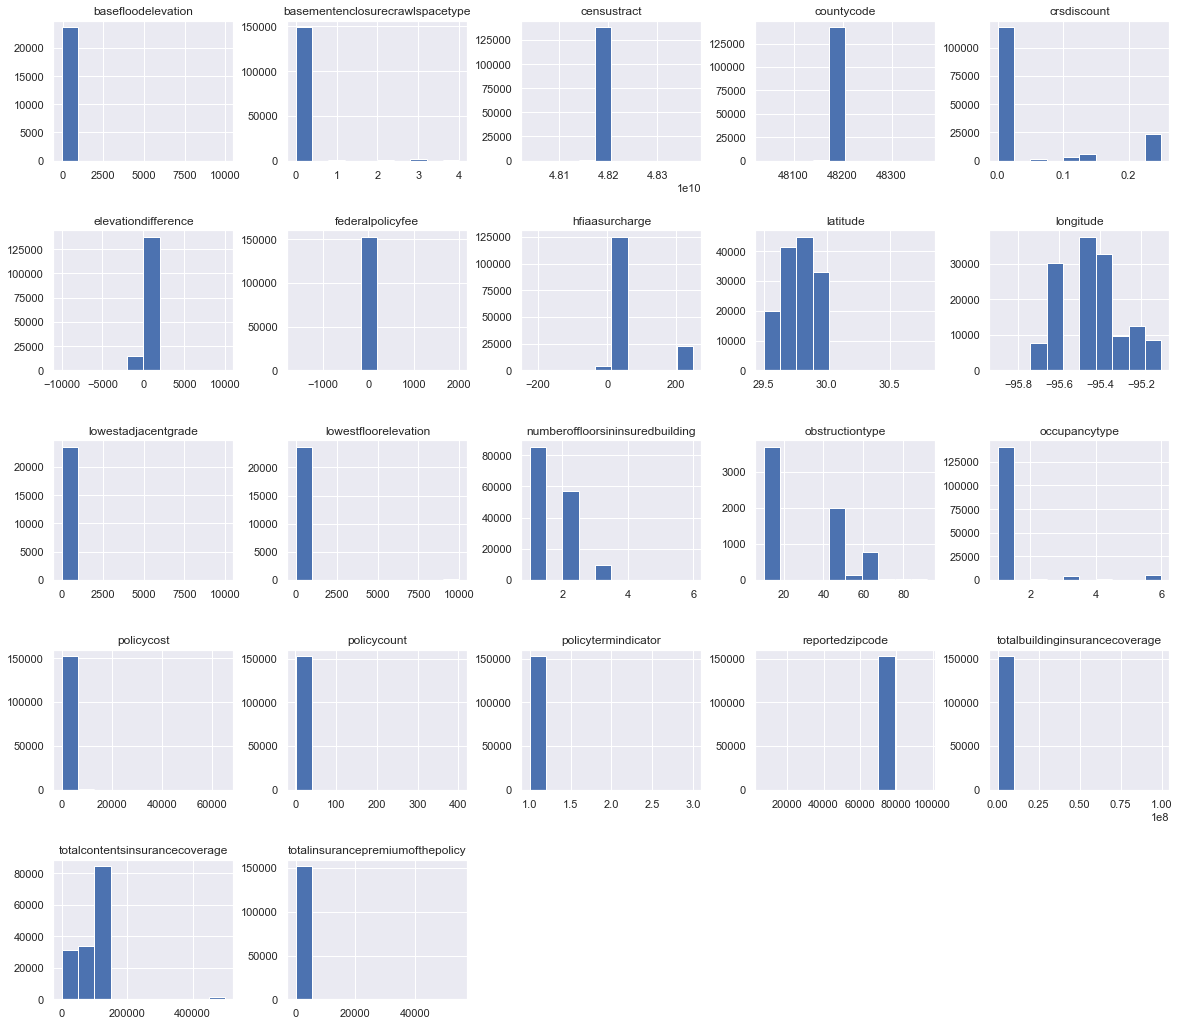

In [26]:
df_num = data2019.select_dtypes(include = ['int64', 'float64'])
df_num.hist(figsize=(20,18))
plt.subplots_adjust(hspace=0.5)

Based on the preliminary analysis, a lot of features are clustered to one end, which indicates there are some extreme values as outliers for most features. 

#### 1.5.4.3 Missing Numeric Values<a id='1.5.4.3_Missing_Numeric_Values'></a>

In [27]:
df_num = data2019.select_dtypes(exclude = 'object')
df_num.isnull().mean() * 100

basefloodelevation                  84.505464
basementenclosurecrawlspacetype      0.003933
cancellationdateoffloodpolicy       99.465118
censustract                          8.893069
countycode                           6.038399
crsdiscount                          0.000000
elevationdifference                  0.000000
federalpolicyfee                     0.000000
hfiaasurcharge                       0.000000
latitude                             8.893069
longitude                            8.893069
lowestadjacentgrade                 84.554625
lowestfloorelevation                84.385508
numberoffloorsininsuredbuilding      0.020320
obstructiontype                     95.631141
occupancytype                        0.000000
originalconstructiondate             0.017698
originalnbdate                       0.000000
policycost                           0.000000
policycount                          0.000000
policyeffectivedate                  0.000000
policyterminationdate             

As we explained earlier, `basefloodelevation`, `lowestadjacentgrade`, `lowestfloorelevation`, `cancellationdateoffloodpolicy`, and `obstructiontype` have a lot of missing values. It's difficult to fill in them with other values. The best way is to delete them in the modeling. 

In addition, a lot of features are actually categorical data, but because they have values of 0, 1, 2, etc., they are grouped in the numerical catrgory. We need to rethink how to investigate them.

#### 1.5.4.4 Select Policy with One-year Period<a id='1.5.4.4_One-year_Policy'></a>

Some of the policies last for more than a year, while some of them last for a much short period. In order to have a consistent dataset, we only select the policy which has one-year period. To do so, we use `policyeffectivedate` and `policyterminationdate` to calculate the days, and keep the records which  have 365 or 366 days.

In [28]:
policy_1year = (((data2019['policyterminationdate'] - data2019['policyeffectivedate']).dt.days == 365) | \
                 ((data2019['policyterminationdate'] - data2019['policyeffectivedate']).dt.days == 366))
data2019[policy_1year].shape[0] / data2019.shape[0] * 100


95.54527160340069

There are more than 95% of records which have one-year period of insurance, so we won't lose many data.

#### 1.5.4.5 Calculate the Buidling Age<a id='1.5.4.5_Buidling_Age'></a>

The building age may be an important factor for the insurance premium. Here we use the `originalconstructiondate` and year 2019 (effective year for the policy) to calculate the building age.

Text(0, 0.5, 'Number of Houses')

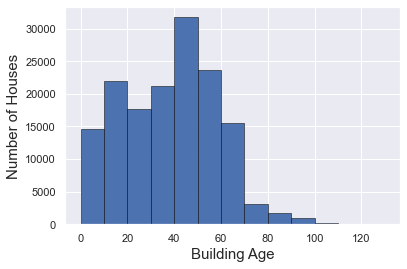

In [29]:
data2019['buildingage'] = 2019 - data2019['originalconstructiondate'].dt.year
plt.plot(figsize=(15,12))
plt.hist(data2019['buildingage'], bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130], edgecolor='black', linewidth=0.5)
plt.xlabel('Building Age', fontsize=15)
plt.ylabel('Number of Houses', fontsize=15)

Most of the buidlings are from 40 to 60 years old. There are some buidlings which are much older, and also others are relatively newer. This new varibale will be used in the modeling.

#### 1.5.4.6 Data Exploration for a Few Features<a id='1.5.4.6_Exploration_Features'></a>

**First, let's check how `totalbuildinginsurancecoverage` look like**

Text(0, 0.5, 'Number of Houses')

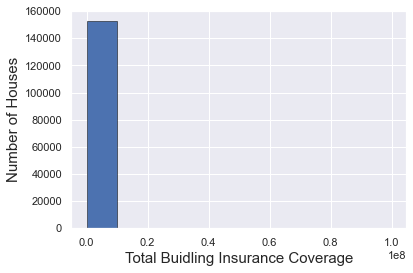

In [30]:
plt.plot(figsize=(15,12))
plt.hist(data2019['totalbuildinginsurancecoverage'], edgecolor='black', linewidth=0.5)
plt.xlabel('Total Buidling Insurance Coverage', fontsize=15)
plt.ylabel('Number of Houses', fontsize=15)

As we can see, the data is clustered to one end, so there are some extreme outlier values. Let's check its statistics.

In [31]:
data2019['totalbuildinginsurancecoverage'].describe()

count    1.525570e+05
mean     2.165369e+05
std      3.417673e+05
min      0.000000e+00
25%      1.500000e+05
50%      2.500000e+05
75%      2.500000e+05
max      9.980980e+07
Name: totalbuildinginsurancecoverage, dtype: float64

As we can see, the mean and median values are in the order of magnitude of 1E+05. The standard deviation is 3.4E+05. We can try to use 95% of the distribution and see how the new data look like.

The percentage of data with 95% interval is:  97.31575738904147
The lower and upper bounds are:  10000.0 500000.0


Text(0, 0.5, 'Number of Houses')

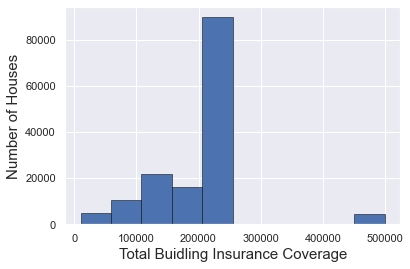

In [32]:
lower, upper = data2019['totalbuildinginsurancecoverage'].quantile([0.025, 0.975])
building_coverage = ((data2019['totalbuildinginsurancecoverage'] >= lower) & (data2019['totalbuildinginsurancecoverage'] <= upper))
test = data2019[building_coverage]['totalbuildinginsurancecoverage']
print('The percentage of data with 95% interval is: ', len(test) / len(data2019['totalbuildinginsurancecoverage']) * 100)
print('The lower and upper bounds are: ', lower, upper)

plt.plot(figsize=(15,12))
plt.hist(test, bins=10, edgecolor='black', linewidth=0.5)
plt.xlabel('Total Buidling Insurance Coverage', fontsize=15)
plt.ylabel('Number of Houses', fontsize=15)

As we can see, the distrubtion looks better. There are still some values higher than 250,000 which causes the long tail. But for now, let's use the 95% rule, and we can furture investigate in EDA if we need to conduct addtional data processing. 

**Next, let's check how `totalcontentsinsurancecoverage` look like**

Text(0, 0.5, 'Number of Houses')

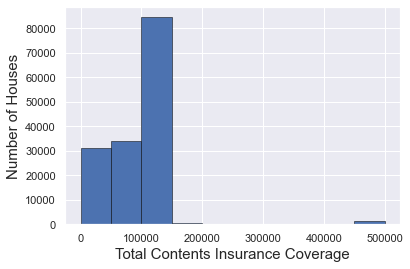

In [33]:
plt.plot(figsize=(15,12))
plt.hist(data2019['totalcontentsinsurancecoverage'], edgecolor='black', linewidth=0.5)
plt.xlabel('Total Contents Insurance Coverage', fontsize=15)
plt.ylabel('Number of Houses', fontsize=15)

In [34]:
data2019['totalcontentsinsurancecoverage'].describe()

count    152557.000000
mean      80185.067221
std       55606.095216
min           0.000000
25%       50000.000000
50%      100000.000000
75%      100000.000000
max      500000.000000
Name: totalcontentsinsurancecoverage, dtype: float64

Let's use the similar 95% rule to see how the new dataset look like

The percentage of data with 95% interval is:  98.13381228000027
The lower and upper bounds are:  0.0 100000.0


Text(0, 0.5, 'Number of Houses')

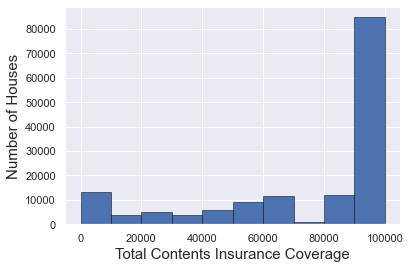

In [35]:
lower, upper = data2019['totalcontentsinsurancecoverage'].quantile([0.025, 0.975])
content_coverage = ((data2019['totalcontentsinsurancecoverage'] >= lower) & (data2019['totalcontentsinsurancecoverage'] <= upper))
test = data2019[content_coverage]['totalcontentsinsurancecoverage']
print('The percentage of data with 95% interval is: ', len(test) / len(data2019['totalcontentsinsurancecoverage']) * 100)
print('The lower and upper bounds are: ', lower, upper)

plt.plot(figsize=(10,8))
plt.hist(test, bins=10, edgecolor='black', linewidth=0.5)
plt.xlabel('Total Contents Insurance Coverage', fontsize=15)
plt.ylabel('Number of Houses', fontsize=15)

**As we explained earlier, we might remove the variables `basefloodelevation`, `elevationdifference`, `lowestadjacentgrade`, and `lowestfloorelevation` because they have a lot of missing values. But first, let's explore their distributions.**

First, let's check the distribution of `basefloodelevation` using the 95% rule.

Text(0, 0.5, 'Number of Houses')

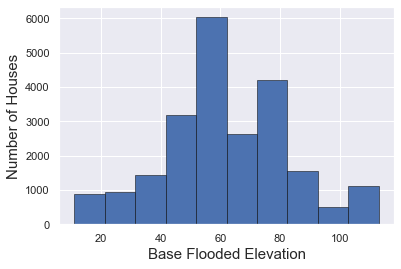

In [36]:
lower, upper = data2019['basefloodelevation'].quantile([0.025, 0.975])
basefloodelevation = ((data2019['basefloodelevation'] >= lower) & (data2019['basefloodelevation'] <= upper))
bfe = data2019[basefloodelevation]['basefloodelevation']

plt.plot(figsize=(10,8))
plt.hist(bfe, bins=10, edgecolor='black', linewidth=0.5)
plt.xlabel('Base Flooded Elevation', fontsize=15)
plt.ylabel('Number of Houses', fontsize=15)

Next, let's check the distribution of `lowestfloorelevation` using the 95% rule.

Text(0, 0.5, 'Number of Houses')

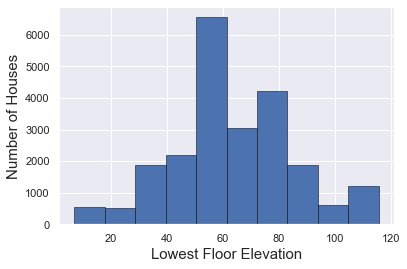

In [37]:
lower, upper = data2019['lowestfloorelevation'].quantile([0.025, 0.975])
lowestfloorelevation = ((data2019['lowestfloorelevation'] >= lower) & (data2019['lowestfloorelevation'] <= upper))
lfe = data2019[lowestfloorelevation]['lowestfloorelevation']
plt.plot(figsize=(10,8))
plt.hist(lfe, bins=10, edgecolor='black', linewidth=0.5)
plt.xlabel('Lowest Floor Elevation', fontsize=15)
plt.ylabel('Number of Houses', fontsize=15)

Next, let's check the distribution of `lowestadjacentgrade` using the 95% rule.

Text(0, 0.5, 'Number of Houses')

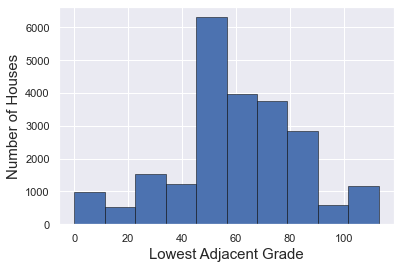

In [38]:
lower, upper = data2019['lowestadjacentgrade'].quantile([0.025, 0.975])
lowestadjacentgrade = ((data2019['lowestadjacentgrade'] >= lower) & (data2019['lowestadjacentgrade'] <= upper))
lag = data2019[lowestadjacentgrade]['lowestadjacentgrade']
plt.plot(figsize=(10,8))
plt.hist(lag, bins=10, edgecolor='black', linewidth=0.5)
plt.xlabel('Lowest Adjacent Grade', fontsize=15)
plt.ylabel('Number of Houses', fontsize=15)

The distributions of the three variables look similar. If we do use them in the modeling, we may only need to use one of them. We can conduct additional analysis in EDA to decide.

For `elevationdifference`, as shown below, there are more than 84% of this variable has a value of 999, which is noted as not reported. 

In [39]:
data2019[(data2019['elevationdifference'] == 999)]['elevationdifference'].value_counts() / data2019.shape[0]

999    0.843967
Name: elevationdifference, dtype: float64

Let's remove the records with value of 999 and see what's left.

In [40]:
temp = data2019[(data2019['elevationdifference'] != 999)]
temp['elevationdifference'].describe()

count    23804.000000
mean         1.415266
std         91.897424
min      -9986.000000
25%          0.000000
50%          1.000000
75%          2.000000
max       9989.000000
Name: elevationdifference, dtype: float64

It still has some extreme values. According to the manual, the difference is generally than 100 ft. Let's remove anything above 100 and below -100.

Text(0, 0.5, 'Number of Houses')

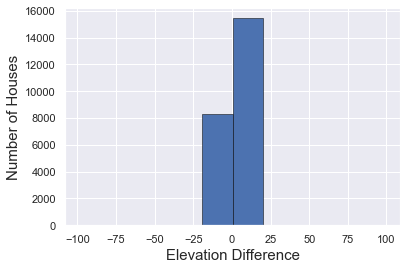

In [41]:
temp = temp[(temp['elevationdifference']<100) & (temp['elevationdifference']> -100)]
plt.plot(figsize=(10,8))
plt.hist(temp['elevationdifference'], bins=10, edgecolor='black', linewidth=0.5)
plt.xlabel('Elevation Difference', fontsize=15)
plt.ylabel('Number of Houses', fontsize=15)

Overall, most values are between -20 and 20 ft. 

**Note that some of the numerical features are actually categorical data, such as `basementenclosurecrawlspacetype`, `policycount`, `numberoffloorsininsuredbuilding`, `occupancytype`. We can conduct furture analysis in EDA.**

### 1.5.5 Target<a id='1.5.5_Target'></a>

**Explore the relationship between `policycost` and `totalinsurancepremiumofthepolicy`**

These two variables: `policycost` and `totalinsurancepremiumofthepolicy`, are related, see the scatter plot below. Since we chose `totalinsurancepremiumofthepolicy` as the target, we can remove `policycost` from the dataset.

Text(0, 0.5, 'Total Insurance Premium')

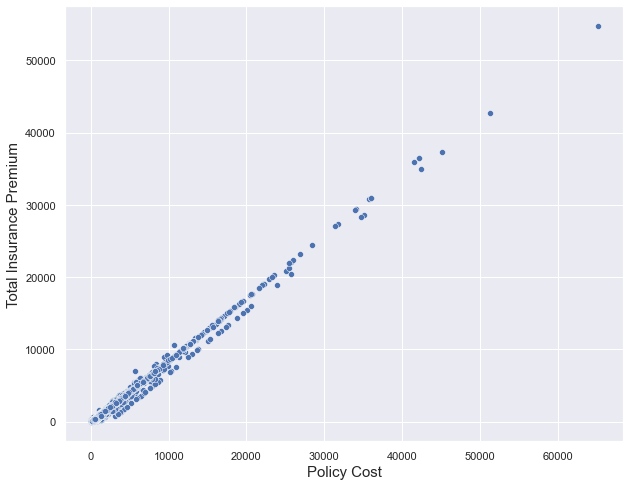

In [42]:
sns.set(style="darkgrid", rc = {'figure.figsize':(10,8)})
sns.scatterplot(x='policycost', y='totalinsurancepremiumofthepolicy', data=data2019)
plt.xlabel('Policy Cost', fontsize=15)
plt.ylabel('Total Insurance Premium', fontsize=15)

`policycost` is calculated by adding together calculated premium, reserve fund assessment, federal policy fee, and HFIAA surcharge. Therefore, if we choose the premium as the target, we can remove reserve fund assessment, remove federal policy fee, and HFIAA surcharge from the dataset. I didn't find anything related to reserve fund assessment, but these two variables: `federalpolicyfee` and `hfiaasurcharge` can be deleted from the modeling.

## 1.6 Data Cleaning and Save New Data<a id='1.6_Data_Cleaning'></a>

As we discussed earlier, some variables will be removed in the modeling, and some will be kept. Also, we consider to some variables which have a lot of missing values, but we may want to bring them back later. 

First, for those variables we will remove for sure, we will drop them.
Second, for those variables we are not 100% sure, I'll create two versions of new datasets - one with those variables removed, and the other one with those variables kept.

In [43]:
data2019.head()

,agriculturestructureindicator,basefloodelevation,basementenclosurecrawlspacetype,cancellationdateoffloodpolicy,censustract,condominiumindicator,construction,countycode,crsdiscount,deductibleamountinbuildingcoverage,...,propertystate,reportedzipcode,ratemethod,regularemergencyprogramindicator,reportedcity,smallbusinessindicatorbuilding,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,totalinsurancepremiumofthepolicy,buildingage
0,N,NaN,0.0,NaT,4.820143e+10,N,N,48201.0,0.0,F,...,TX,77024,7,R,HOUSTON,N,250000,100000,376,60.0
1,N,NaN,0.0,NaT,4.820152e+10,N,N,48201.0,0.0,F,...,TX,77043,7,R,HOUSTON,N,200000,80000,353,54.0
2,N,NaN,0.0,NaT,4.820154e+10,N,N,48201.0,0.0,F,...,TX,77084,7,R,HOUSTON,N,250000,100000,374,13.0
3,N,NaN,0.0,NaT,NaN,N,N,NaN,0.0,F,...,TX,77008,7,R,HOUSTON,N,250000,100000,376,17.0
4,N,NaN,0.0,NaT,NaN,N,N,48201.0,0.0,F,...,TX,77067,7,R,HOUSTON,N,250000,100000,376,38.0


The variables we will drop for sure include: `agriculturestructureindicator`, `cancellationdateoffloodpolicy`, `censustract`, `countycode`, `federalpolicyfee`, `hfiaasurcharge`, `houseofworshipindicator`, `latitude`, `longitude`, `nonprofitindicator`, `obstructiontype`, `originalconstructiondate`, `originalnbdate`, `policycost`, `policytermindicator`, `postfirmconstructionindicator`, `propertystate`, `reportedzipcode`, `regularemergencyprogramindicator`, `reportedcity`. 

In [44]:
df = data2019.drop(columns=['agriculturestructureindicator', 'cancellationdateoffloodpolicy', 'censustract', 
                                'countycode', 'federalpolicyfee', 'hfiaasurcharge', 'houseofworshipindicator', 
                                'latitude', 'longitude', 'nonprofitindicator', 'obstructiontype', 
                                 'originalconstructiondate', 'originalnbdate', 'policycost', 'policytermindicator', 
                                'postfirmconstructionindicator', 'propertystate', 'reportedzipcode', 
                                'regularemergencyprogramindicator', 'reportedcity'])
df.head()

,basefloodelevation,basementenclosurecrawlspacetype,condominiumindicator,construction,crsdiscount,deductibleamountinbuildingcoverage,deductibleamountincontentscoverage,elevatedbuildingindicator,elevationcertificateindicator,elevationdifference,...,policycount,policyeffectivedate,policyterminationdate,primaryresidenceindicator,ratemethod,smallbusinessindicatorbuilding,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,totalinsurancepremiumofthepolicy,buildingage
0,NaN,0.0,N,N,0.0,F,F,N,NaN,999,...,1,2019-07-28,2020-07-28,N,7,N,250000,100000,376,60.0
1,NaN,0.0,N,N,0.0,F,F,N,NaN,999,...,1,2019-04-25,2020-04-25,Y,7,N,200000,80000,353,54.0
2,NaN,0.0,N,N,0.0,F,F,N,NaN,999,...,1,2019-02-15,2020-02-15,Y,7,N,250000,100000,374,13.0
3,NaN,0.0,N,N,0.0,F,F,N,NaN,999,...,1,2019-08-07,2020-08-07,Y,7,N,250000,100000,376,17.0
4,NaN,0.0,N,N,0.0,F,F,N,NaN,999,...,1,2019-07-11,2020-07-11,Y,7,N,250000,100000,376,38.0


Next, we only use the subset when the policy has one-year period.

In [45]:
policy_1year = (((df['policyterminationdate'] - df['policyeffectivedate']).dt.days == 365) | \
                 ((df['policyterminationdate'] - df['policyeffectivedate']).dt.days == 366))
df = df[policy_1year]
df.shape

(145761, 26)

After we keep the policies with only one-year period, we can remove the variables of `policyeffectivedate` and `policyterminationdate` since all these policies are for year 2019. 

In [46]:
df = df.drop(columns=['policyeffectivedate', 'policyterminationdate'])
df.head()

,basefloodelevation,basementenclosurecrawlspacetype,condominiumindicator,construction,crsdiscount,deductibleamountinbuildingcoverage,deductibleamountincontentscoverage,elevatedbuildingindicator,elevationcertificateindicator,elevationdifference,...,numberoffloorsininsuredbuilding,occupancytype,policycount,primaryresidenceindicator,ratemethod,smallbusinessindicatorbuilding,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,totalinsurancepremiumofthepolicy,buildingage
0,NaN,0.0,N,N,0.0,F,F,N,NaN,999,...,1.0,1,1,N,7,N,250000,100000,376,60.0
1,NaN,0.0,N,N,0.0,F,F,N,NaN,999,...,1.0,1,1,Y,7,N,200000,80000,353,54.0
2,NaN,0.0,N,N,0.0,F,F,N,NaN,999,...,1.0,1,1,Y,7,N,250000,100000,374,13.0
3,NaN,0.0,N,N,0.0,F,F,N,NaN,999,...,3.0,1,1,Y,7,N,250000,100000,376,17.0
4,NaN,0.0,N,N,0.0,F,F,N,NaN,999,...,1.0,1,1,Y,7,N,250000,100000,376,38.0


Also, we only use the subset where policycount=1 so that we only focus on the data where there is a single policy.

In [47]:
policy_count = (df['policycount']  == 1)
df = df[policy_count]
df.shape

(145410, 24)

After we keep the policies with policycount=1, we can remove the variable of `policycount`.

In [48]:
df = df.drop(columns='policycount')
df.head()

,basefloodelevation,basementenclosurecrawlspacetype,condominiumindicator,construction,crsdiscount,deductibleamountinbuildingcoverage,deductibleamountincontentscoverage,elevatedbuildingindicator,elevationcertificateindicator,elevationdifference,...,lowestfloorelevation,numberoffloorsininsuredbuilding,occupancytype,primaryresidenceindicator,ratemethod,smallbusinessindicatorbuilding,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,totalinsurancepremiumofthepolicy,buildingage
0,NaN,0.0,N,N,0.0,F,F,N,NaN,999,...,NaN,1.0,1,N,7,N,250000,100000,376,60.0
1,NaN,0.0,N,N,0.0,F,F,N,NaN,999,...,NaN,1.0,1,Y,7,N,200000,80000,353,54.0
2,NaN,0.0,N,N,0.0,F,F,N,NaN,999,...,NaN,1.0,1,Y,7,N,250000,100000,374,13.0
3,NaN,0.0,N,N,0.0,F,F,N,NaN,999,...,NaN,3.0,1,Y,7,N,250000,100000,376,17.0
4,NaN,0.0,N,N,0.0,F,F,N,NaN,999,...,NaN,1.0,1,Y,7,N,250000,100000,376,38.0


Finally, let's apply the 95% rule for `totalbuildinginsurancecoverage` and `totalcontentsinsurancecoverage` to remove the extreme outlier values.

In [49]:
lower, upper = df['totalbuildinginsurancecoverage'].quantile([0.025, 0.975])
building_coverage = ((df['totalbuildinginsurancecoverage'] >= lower) & (df['totalbuildinginsurancecoverage'] <= upper))
df = df[building_coverage]

df.shape

(141774, 23)

In [50]:
lower, upper = df['totalcontentsinsurancecoverage'].quantile([0.025, 0.975])
content_coverage = ((df['totalcontentsinsurancecoverage'] >= lower) & (df['totalcontentsinsurancecoverage'] <= upper))
df = df[content_coverage]

df.shape

(139776, 23)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139776 entries, 0 to 155017
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   basefloodelevation                  20187 non-null   float64
 1   basementenclosurecrawlspacetype     139770 non-null  float64
 2   condominiumindicator                139776 non-null  object 
 3   construction                        139776 non-null  object 
 4   crsdiscount                         139776 non-null  float64
 5   deductibleamountinbuildingcoverage  139776 non-null  object 
 6   deductibleamountincontentscoverage  133454 non-null  object 
 7   elevatedbuildingindicator           139770 non-null  object 
 8   elevationcertificateindicator       40032 non-null   object 
 9   elevationdifference                 139776 non-null  int64  
 10  floodzone                           139775 non-null  object 
 11  locationofcontents        

Let's check again the missing values for each variable.

In [52]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
lowestadjacentgrade,119665,85.611979
basefloodelevation,119589,85.557606
lowestfloorelevation,119411,85.430260
elevationcertificateindicator,99744,71.359890
locationofcontents,21303,15.240814
deductibleamountincontentscoverage,6322,4.522951
ratemethod,957,0.684667
smallbusinessindicatorbuilding,17,0.012162
elevatedbuildingindicator,6,0.004293
basementenclosurecrawlspacetype,6,0.004293


Because we are not 100% sure if we want to remove `lowestadjacentgrade`, `basefloodelevation`, and `lowestfloorelevation`, and `elevationcertificateindicato`, which have more than 70% of missing values, we will drop the records for other variables where they have missing values first.

In [53]:
df = df.dropna(subset=['floodzone','numberoffloorsininsuredbuilding','basementenclosurecrawlspacetype',
                             'elevatedbuildingindicator','smallbusinessindicatorbuilding','ratemethod',
                            'deductibleamountincontentscoverage', 'locationofcontents'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117441 entries, 0 to 155017
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   basefloodelevation                  13533 non-null   float64
 1   basementenclosurecrawlspacetype     117441 non-null  float64
 2   condominiumindicator                117441 non-null  object 
 3   construction                        117441 non-null  object 
 4   crsdiscount                         117441 non-null  float64
 5   deductibleamountinbuildingcoverage  117441 non-null  object 
 6   deductibleamountincontentscoverage  117441 non-null  object 
 7   elevatedbuildingindicator           117441 non-null  object 
 8   elevationcertificateindicator       36993 non-null   object 
 9   elevationdifference                 117441 non-null  int64  
 10  floodzone                           117441 non-null  object 
 11  locationofcontents        

After we delete some variabes, we need to check if there are duplicate records again, and delete those duplicate values.

In [54]:
df.drop_duplicates(keep='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32364 entries, 0 to 155016
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   basefloodelevation                  13521 non-null  float64
 1   basementenclosurecrawlspacetype     32364 non-null  float64
 2   condominiumindicator                32364 non-null  object 
 3   construction                        32364 non-null  object 
 4   crsdiscount                         32364 non-null  float64
 5   deductibleamountinbuildingcoverage  32364 non-null  object 
 6   deductibleamountincontentscoverage  32364 non-null  object 
 7   elevatedbuildingindicator           32364 non-null  object 
 8   elevationcertificateindicator       12130 non-null  object 
 9   elevationdifference                 32364 non-null  int64  
 10  floodzone                           32364 non-null  object 
 11  locationofcontents                  3236

Now we have no missing values for all variables except for those three: `lowestadjacentgrade`, `basefloodelevation`, and `lowestfloorelevation`. We will save this dataset to a new csv file. During EDA, we will conduct furture analysis to decide if we want to keep the three variables or not. 

In [56]:
df.to_csv('../data/houston-2019.csv', index=False)

As we said earlier, we may also need the 2018 dataset. If we decide that we need them later, we will conduct the same data cleaning process to generate the new dataset for 2018. 

## 1.7 Summary<a id='1.7_Summary'></a>

We conducted the data cleaning and pre-processing to check the missing values and outlier values, to decide which variables we want to use in the modeling, to explore the distributions of some numerical features, and to explore the median values for some categorical features. In the end, we have a much cleaner dataset which we will conduct further analysis in EDA.